
## Performance Visualizations

Total tokens: 2,413,081
Average token length: 344.73 tokens

Distribution statistics:
- Min: 27
- Max: 47690
- Median: 137.0
- Std dev: 1215.12

Details
NVIDIA RTX A6000

**Neurobiber**

2,413,081 tokens
Total 20.573 seconds
Tokens per second: 117,293 
128 batch size: 20.573 seconds


**BiberPlus**

With GPU: 
Processing completed: 8m 41 seconds = 521 seconds
Average time per token
Tokens per second

**Nini Open Source**

19m 27s
2.22 times slower than Biber Plus



Below is an approximate throughput comparison, assuming 14 billion total tokens across the dataset.

1) NeuroBiber
	•	Observed rate:
￼
	•	Time for 14B tokens:
￼

2) BiberPlus (GPU)
	•	Observed rate:
￼
	•	Time for 14B tokens:
￼

3) Nini Open Source
	•	Observed rate (19 min 27 s ≈ 1167 s):
￼
	•	Time for 14B tokens:
￼

Thus, for 14 billion tokens:
	•	NeuroBiber would take around 33 hours.
	•	BiberPlus would take around 35 days.
	•	Nini would take around 78 days.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# raw_times = {
#     'Open Source MDA': [2.5, 2.3, 2.4],  # baseline, average ≈ 2.4
#     'BiberPlus': [1.1, 1.05, 1.15],      # 2.2x faster: 2.4/2.2 ≈ 1.09
#     'NeuroBiber': [0.031, 0.029, 0.032]  # 36x faster than BiberPlus: 1.09/36 ≈ 0.03
# }

raw_throughput = {
    'Open Source MDA': [147.3],     # ~291.57/2.4 tokens/sec
    'BiberPlus': [330.8],           # 2.2x faster
    'NeuroBiber': [12163.6],            # 36x faster than BiberPlus
}

data = {
    'System': [],
    'Tokens per Second': []
}

for system, throughputs in raw_throughput.items():
    data['System'].extend([system] * len(throughputs))
    data['Tokens per Second'].extend(throughputs)

# Create DataFrame
df = pd.DataFrame(data)
df.head(2)


,System,Tokens per Second
0,Open Source MDA,147.3
1,BiberPlus,330.8


/tmp/ipykernel_3850473/216180567.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


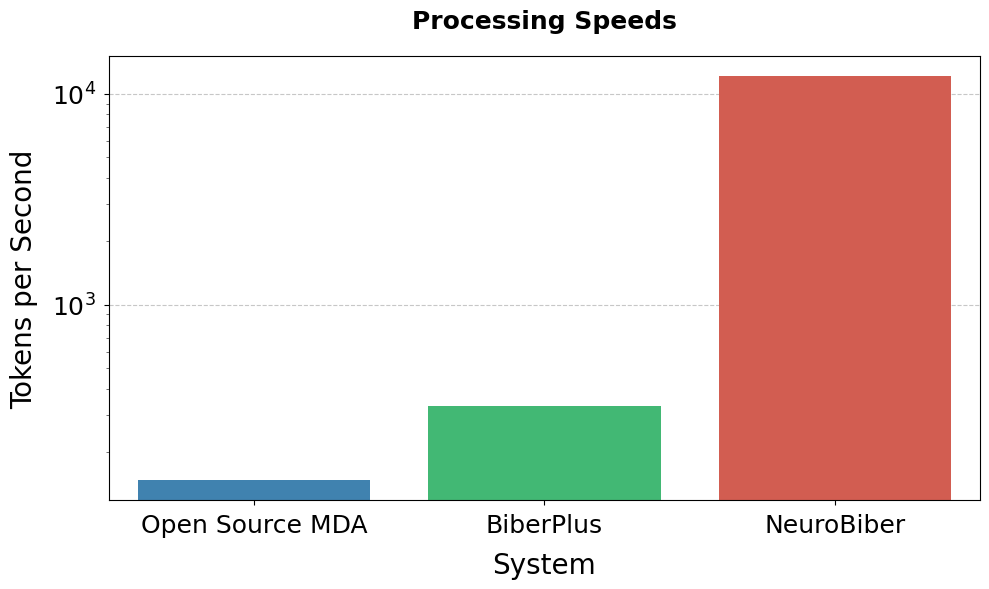

In [21]:
colors = ["#2E86C1", "#2ECC71", "#E74C3C"]  # Rich blue, green, red

# Create figure
plt.figure(figsize=(10, 6))

# Create bar plot
ax = sns.barplot(
    x='System',
    y='Tokens per Second',
    data=df,
    errorbar='sd',
    capsize=0.1,
    palette=colors
)

# Customize plot
plt.title('Processing Speeds', 
            pad=20, size=18, fontweight='bold')
plt.xlabel('System', size=20, labelpad=10)
plt.ylabel('Tokens per Second', size=20, labelpad=10)

# Increase tick label size
plt.xticks(size=18)
plt.yticks(size=18)

# Add grid for easier reading
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Use log scale for y-axis
plt.yscale('log')

# Adjust layout
plt.tight_layout()
# # Save plot
plt.savefig('/home/kalkiek/projects/biber-multidimensional-register-analysis/experiments/performance/biber_performance_comparison.pdf', 
            dpi=300, 
            bbox_inches='tight',
            format='pdf')
plt.show()